MNIST

In [3]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

In [4]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [5]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


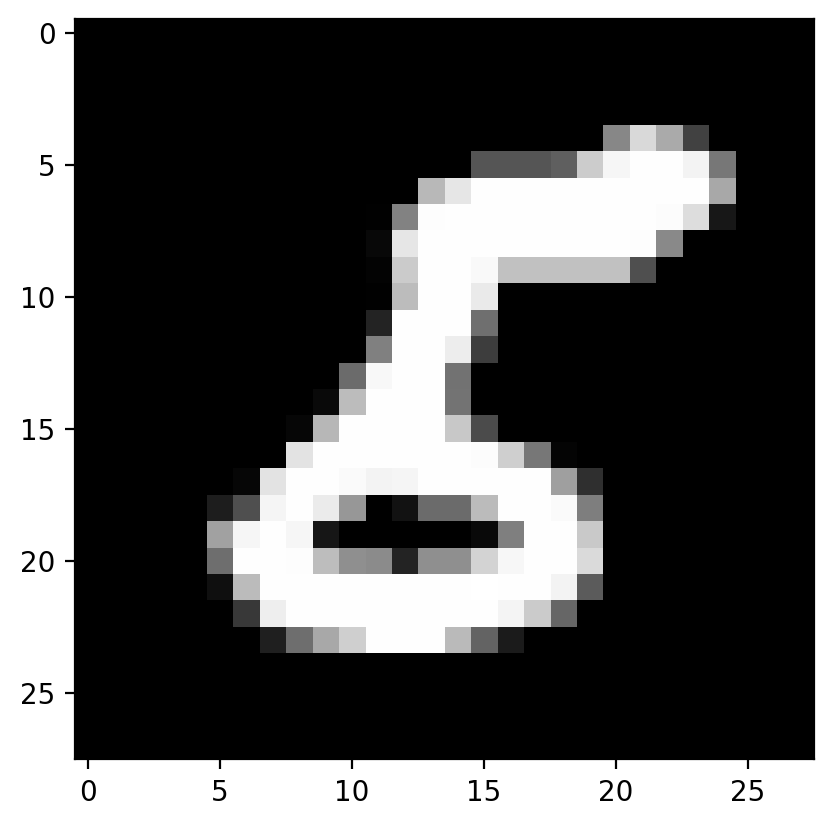

In [7]:

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Exercise: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [8]:
## Your solution

# Definição da função de ativação sigmoidal
def activation(x): 
    return 1/(1+torch.exp(-x))

# Remodelagem das imagens para um tensor de entrada
# Pega a quantidade de lotes das imagens (64), -1 = inferir automaticamente o tamanho da segunda dimensão 
# de modo que o número total de elementos no tensor seja preservado após a remodelagem
inputs = images.view(images.shape[0], -1)

print(images.shape)
print(inputs.shape)



torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


Se images tem o tamanho [64, 1, 28, 28], isso significa que é um tensor com 64 amostras no lote, cada uma representando uma imagem de 28x28 pixels em escala de cinza (um único canal de cor).

Para transformar essas imagens em um formato adequado para alimentar uma rede neural totalmente conectada, precisamos achatar cada imagem em um vetor unidimensional. Isso significa que cada imagem de 28x28 pixels será transformada em um vetor de comprimento 784 (28x28).

inputs = images.view(images.shape[0], -1) realiza essa operação de achatamento.

- images.shape[0] é igual a 64, que é o número de amostras no lote.
- -1 é usado para que o PyTorch possa inferir automaticamente o tamanho da segunda dimensão para garantir que o número total de elementos no tensor seja preservado após a remodelagem.

- inputs = images.view(64, -1) remodela o tensor images para ter <b>64 linhas (uma para cada amostra no lote) e uma quantidade de colunas que é calculada automaticamente para garantir que o número total de elementos seja preservado.</b> 

- Neste caso, como cada imagem é achatada em um vetor de 784 elementos, a segunda dimensão será 784.

Portanto, o tensor resultante inputs terá o tamanho [64, 784], o que significa que agora cada amostra no lote é representada como um vetor unidimensional de 784 elementos.

In [9]:
INPUTS = 784 #28 X 28
HIDDEN_LAYERS = 256 
OUTPUTS = 10

w1 = torch.randn(INPUTS, HIDDEN_LAYERS) # unidades de entrada (784 unidades) às unidades da camada oculta (256 unidades).
b1 = torch.randn(256) # O valor de b1 = torch.randn(256) define o viés (bias) para cada uma das 256 unidades na camada oculta. Cada unidade na camada oculta terá seu próprio viés associado.

w2 = torch.randn(HIDDEN_LAYERS, OUTPUTS) # conecta as 256 unidades da camada oculta às 10 unidades de saída.
b2 = torch.randn(10) # dimensão (10), um para cada unidade de saída.

h = activation(torch.mm(inputs, w1) + b1)
out = activation(torch.mm(h, w2) + b2)

print(out.shape)
print(out)

torch.Size([64, 10])
tensor([[9.8932e-01, 8.1616e-01, 9.9263e-01, 9.9991e-01, 1.5277e-05, 1.0481e-01,
         9.7723e-01, 9.9986e-01, 1.0000e+00, 9.9999e-01],
        [4.2004e-01, 9.0687e-01, 1.1100e-03, 9.9984e-01, 1.3284e-07, 9.9976e-01,
         7.2396e-03, 9.9995e-01, 1.0000e+00, 9.9959e-01],
        [9.9807e-01, 8.9286e-01, 1.1004e-01, 1.0000e+00, 5.2109e-07, 7.3538e-01,
         5.7759e-01, 1.0000e+00, 1.0000e+00, 9.9991e-01],
        [9.8053e-01, 1.4576e-01, 8.8533e-01, 9.9995e-01, 1.9854e-02, 9.9842e-01,
         6.8889e-01, 9.9993e-01, 1.0000e+00, 9.4537e-01],
        [9.7440e-01, 9.5592e-01, 6.3563e-02, 9.9999e-01, 7.7137e-07, 9.9999e-01,
         3.1714e-03, 9.9865e-01, 1.0000e+00, 1.0000e+00],
        [8.6028e-01, 4.1249e-03, 1.5434e-03, 1.0000e+00, 1.4278e-05, 9.9506e-01,
         2.9631e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [7.8191e-02, 7.7837e-03, 4.0699e-04, 9.9985e-01, 2.9154e-07, 9.9743e-01,
         9.9703e-01, 1.0000e+00, 1.0000e+00, 1.0000e+00],
      

In [10]:
#  equivalente a sigmoid, mas quando há 3 ou mais classes.
def softmax(x):   
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)
    
# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


Building networks with PyTorch

In [11]:
from torch import nn

In [12]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    # Este método define como os dados serão passados pela rede durante a propagação direta.
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x) # Passa os dados de entrada x pela camada oculta.
        x = self.sigmoid(x) # Aplica a função de ativação sigmóide às saídas da camada oculta.
        x = self.output(x) # Passa as saídas da camada oculta pela camada de saída.
        x = self.softmax(x) # Aplica a função softmax às saídas finais da rede, normalizando-as para que representem probabilidades.

        return x # Retorna as saídas finais da rede, que serão as probabilidades calculadas para cada classe.

In [13]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [14]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

- It's good practice to name your layers by their type of network, for instance 'fc' to represent a fully-connected layer. As you code your solution, use fc1, fc2, and fc3 as your layer names.

In [15]:
#dois modos de escrita, um com a biblioteca de funcoes e outro com a classe

import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 10)
        
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        
        return x

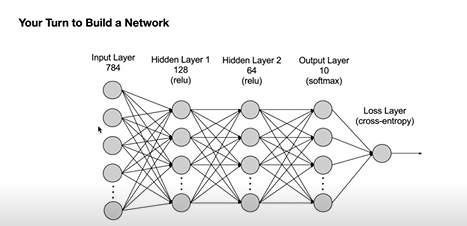

Solução:

In [16]:
## Solution

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [17]:
print(model.fc1.weight) #pesos da primeira camada linear (fc1)
print(model.fc1.bias) #bias da primeira camada linear (fc1)

Parameter containing:
tensor([[-0.0199, -0.0283,  0.0036,  ..., -0.0248, -0.0113, -0.0347],
        [ 0.0306,  0.0121,  0.0159,  ...,  0.0252, -0.0217, -0.0336],
        [-0.0072,  0.0044, -0.0265,  ...,  0.0025, -0.0099,  0.0252],
        ...,
        [-0.0019, -0.0185,  0.0050,  ..., -0.0297, -0.0317, -0.0231],
        [-0.0020, -0.0146,  0.0290,  ...,  0.0018,  0.0204,  0.0289],
        [ 0.0082, -0.0291,  0.0110,  ...,  0.0009,  0.0174, -0.0197]],
       requires_grad=True)
Parameter containing:
tensor([-3.1095e-02, -1.1705e-02, -3.0427e-02,  1.0494e-02, -6.5115e-03,
         2.6276e-02, -9.1201e-03, -1.4108e-02,  3.4691e-02,  9.4826e-03,
        -2.7649e-02,  1.0602e-02,  2.2586e-03, -1.3780e-03,  3.5422e-05,
         2.9403e-02, -3.0077e-02,  1.5617e-02,  6.6780e-03,  1.5365e-02,
        -2.5874e-03, -3.4234e-02,  1.3331e-02,  9.2535e-03,  1.1860e-03,
        -2.0834e-02, -1.9103e-02, -1.0820e-02, -3.1069e-02, -1.4662e-02,
        -1.9132e-02, -2.8621e-04, -2.0174e-02, -1.8509e-0

In [25]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

model.fc1.weight: Acessa os pesos da primeira camada linear (fc1) da rede neural.

data: Acessa os valores dos pesos diretamente, sem envolver nenhum wrapper de PyTorch.

normal_: Este método amostra valores de uma distribuição normal (gaussiana).

std=0.01: Especifica o desvio padrão da distribuição normal. Um desvio padrão de 0.01 significa que os valores amostrados serão próximos à média (que é zero neste caso), com a maioria dos valores dentro de um intervalo pequeno em torno da média.

Essa abordagem de inicialização é uma técnica comum para inicializar os pesos em redes neurais, especialmente em arquiteturas mais profundas. Inicializar os pesos com valores muito pequenos, como desvios padrão pequenos, ajuda a evitar problemas de saturação em unidades de ativação, que podem ocorrer quando os pesos são inicializados com valores muito grandes ou muito pequenos. Isso ajuda a garantir que os gradientes durante o treinamento não se tornem muito pequenos ou muito grandes, facilitando a convergência do algoritmo de otimização.

In [19]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0040,  0.0062,  0.0024,  ..., -0.0143,  0.0039, -0.0052],
        [ 0.0027,  0.0075,  0.0079,  ..., -0.0143,  0.0101, -0.0062],
        [ 0.0131,  0.0079, -0.0161,  ...,  0.0088,  0.0238, -0.0002],
        ...,
        [-0.0136,  0.0122, -0.0034,  ..., -0.0007,  0.0039,  0.0121],
        [ 0.0025,  0.0058,  0.0053,  ..., -0.0141,  0.0082,  0.0116],
        [-0.0014,  0.0111,  0.0104,  ...,  0.0122,  0.0023,  0.0054]])


Forward pass

Now that we have a network, let's see what happens when we pass in an image.

In [20]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2024-02-20 14:45:13--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2,7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2,75K  --.-KB/s    in 0s      

2024-02-20 14:45:13 (23,0 MB/s) - ‘helper.py.1’ saved [2813/2813]



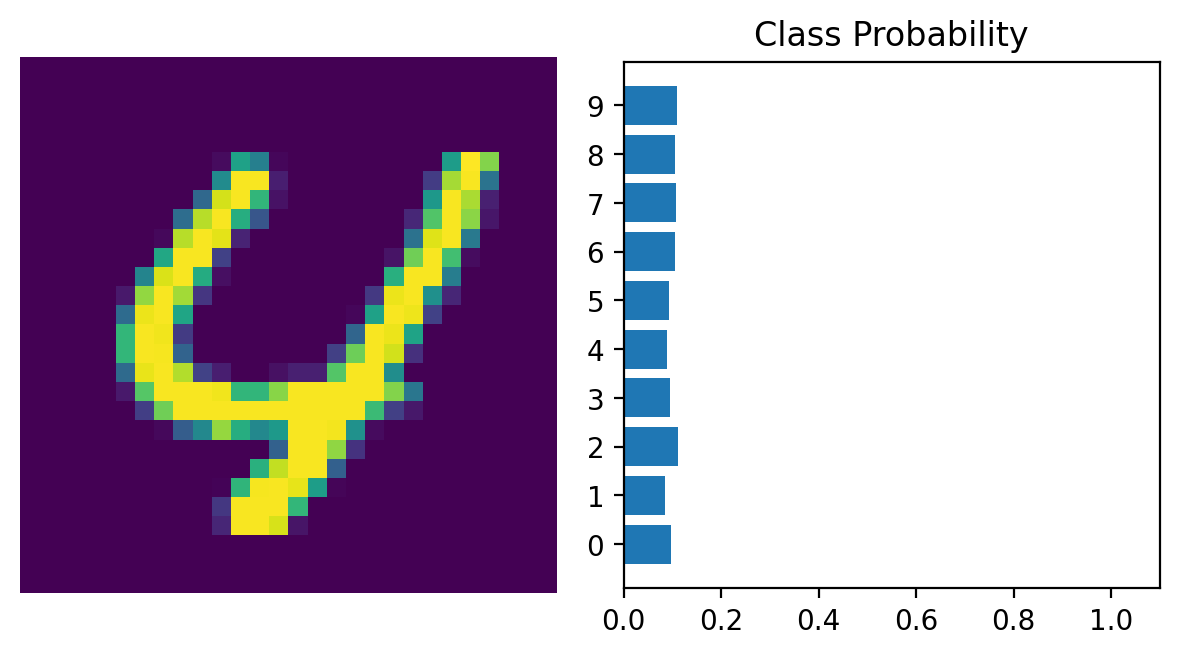

In [27]:
import helper #arquivo que tem as funcoes necessarias

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

<H1>Using nn.Sequential</H1>

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential (documentation).

OBS: Ambas as abordagens são válidas e produzirão o mesmo resultado, mas a primeira abordagem usando nn.Sequential tende a ser mais concisa e é frequentemente preferida por sua simplicidade e clareza. A outra abordagem oferece mais flexibilidade se você precisar de mais controle sobre como as camadas estão interagindo durante o forward.

Using this to build the equivalent network:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


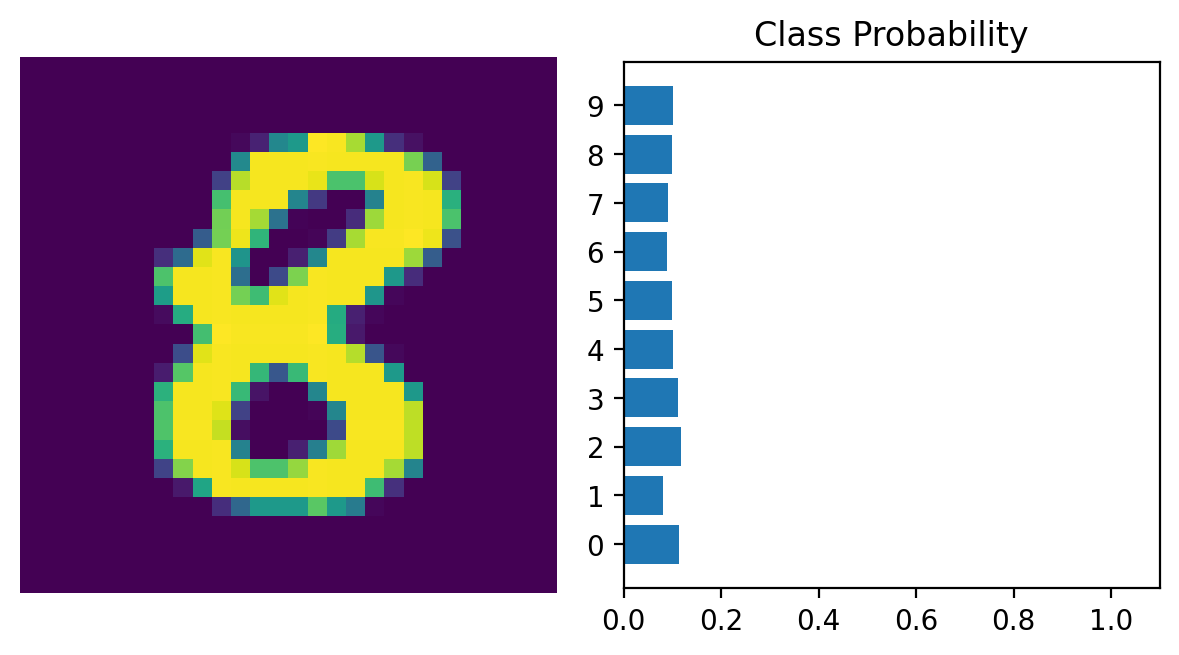

In [22]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

 The operations are availble by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use model[0].
 
 
 Ou seja, ao utilizar nn.Sequential para criar uma rede neural, você pode acessar as camadas individuais dessa rede usando índices numéricos, como se fosse uma lista. Por exemplo, se você deseja acessar a primeira camada linear na rede neural construída usando nn.Sequential, você pode usar model[0].

In [28]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0166,  0.0083,  0.0272,  ..., -0.0232, -0.0145,  0.0010],
        [-0.0224,  0.0126,  0.0284,  ...,  0.0169,  0.0124,  0.0021],
        [-0.0239,  0.0016,  0.0143,  ..., -0.0207, -0.0163, -0.0230],
        ...,
        [-0.0010, -0.0158,  0.0139,  ...,  0.0037,  0.0167, -0.0235],
        [-0.0322,  0.0063,  0.0227,  ..., -0.0098,  0.0105,  0.0310],
        [ 0.0138,  0.0262, -0.0133,  ...,  0.0178, -0.0290,  0.0031]],
       requires_grad=True)

Ao usar a classe nn.Sequential em PyTorch para construir uma rede neural, em vez de fornecer uma lista sequencial de camadas, você pode fornecer um OrderedDict. Isso permite nomear individualmente as camadas e operações da rede neural.

Usar um OrderedDict para nomear camadas é útil em situações onde a legibilidade do código é importante e quando você precisa se referir a camadas específicas por nomes descritivos durante o treinamento ou a análise do modelo.

In [24]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Now you can access layers either by integer or the name

In [29]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
